In [226]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingClassifier
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [227]:
data = pd.read_csv("C:/Users/xfach/Senzmate/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [228]:
direc="/Users/xfach/Senzmate/upload_filecode/plots/"
ans=data.skew(axis = 0, skipna = True)
#dfi.export(ans,direc+"colummn_skewness .png")
ans.dtype

dtype('float64')

In [229]:
column="Age"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


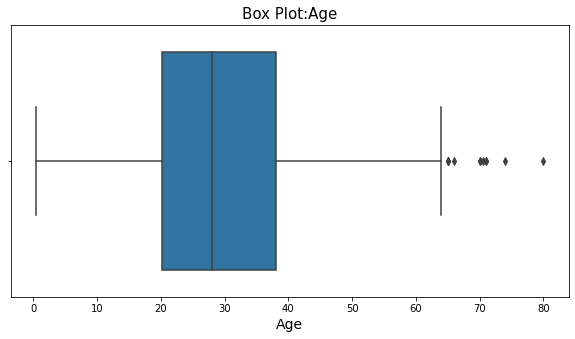

In [230]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(data[column])
plt.title("Box Plot:"+column, fontsize=15)
plt.xlabel(column, fontsize=14)
direc="/Users/xfach/Senzmate/upload_filecode/plots/"
plt.show()

<AxesSubplot:>

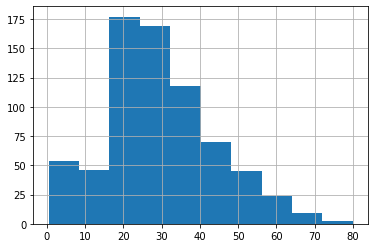

In [231]:
data[column].hist()

In [232]:
 direc="/Users/xfach/Senzmate/upload_filecode/plots/"
Q1=data[column].quantile(0.25)
Q3=data[column].quantile(0.75)
IQR=Q3-Q1
whisker_width = 1.5
col_outliers_iqr = data[(data[column] < Q1 - whisker_width*IQR) | (data[column] > Q3 + whisker_width*IQR)]
dfi.export(col_outliers_iqr,direc+column+" outlier_df_iqr.png")
#col_outliers.savefig(direc+column+" iqr1.png")
col_outliers_iqr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [233]:
col_mean = data[column].mean()
col_std = data[column].std()
low= col_mean -(3 * col_std)
high= col_mean + (3 * col_std)
col_outliers_sd = data[(data[column] < low) | (data[column] > high)]
dfi.export(col_outliers_sd,direc+column+" outlier_df_sd.png")
#col_outliers.savefig(direc+column+" iqr1.png")
col_outliers_sd 
  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [234]:
r_column="Age"
Q1 = data[r_column].quantile(0.25)
Q3 = data[r_column].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data[r_column]=np.where(data[r_column]>upper_whisker,upper_whisker,np.where(data[r_column]<lower_whisker,lower_whisker,data[r_column]))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


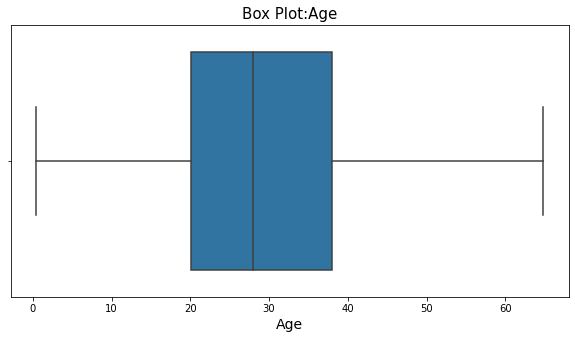

In [235]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(data[column])
plt.title("Box Plot:"+column, fontsize=15)
plt.xlabel(column, fontsize=14)
direc="/Users/xfach/Senzmate/upload_filecode/plots/"
plt.show()

<AxesSubplot:>

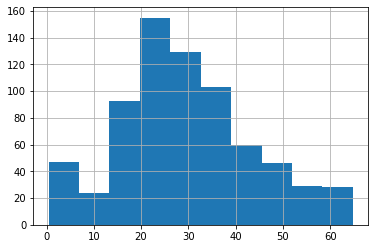

In [236]:
data[r_column].hist()

In [237]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#  Handling null values

In [238]:
missing_values=data.isnull().sum()
print(missing_values[missing_values>0]/len(data)*100)

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64


In [239]:
#removing column with missingvalues >90% and returning new dataframe.
perc = 90.0 
min_count =  int(((100-perc)/100)*data.shape[0] + 1)
data = data.dropna( axis=1,thresh=min_count)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [240]:
#return categrcal column list with missing values        
def _catcol(data):
    nan_values = data. isna()
    nan_columns = nan_values. any()
    columns_with_nan = data. columns[nan_columns]. tolist()

    cat_var=data.columns[data.dtypes == 'object']
    cat_var_null=set(cat_var).intersection(columns_with_nan)
    return cat_var_null
#return numerical column list with missing values  
def _numcol(data):
    nan_values = data. isna()
    nan_columns = nan_values. any()
    columns_with_nan = data. columns[nan_columns]. tolist()

    num_var=data.columns[data.dtypes != 'object']
    num_var_null=set(num_var).intersection(columns_with_nan)
    return num_var_null
#create fill_startegy_list for filling numerical columns by default mode
def d_fill_startegy_list(data):
    numcol1= _numcol(data) #numerical column list with missing values 
    d_strategy_dictionary={} #dictionary
    for cols in numcol1:
        if data[cols].dtype=='int64':
            d_strategy_dictionary[cols] = "Mode"
        elif data[cols].dtype=='float64':
             d_strategy_dictionary[cols] = "Mean"
        else:
            d_strategy_dictionary[cols] = "Median"
        return d_strategy_dictionary

#create fill_startegy_list for filling numerical columns by manual mode
def u_fill_startegy_list(data):
    numcol2= _numcol(data)#numerical column list with missing values 
    print(numcol2)
    u_strategy_dictionary={} #dictionary
    modedefined=input("Enter filling mode")
    for cols in numcol2: 
        u_strategy_dictionary[cols] = modedefined
    return u_strategy_dictionary
#filling missing values in each column by manual , by taking mode from user mode/mean/median/none/uservalue
def fill_na(data, fill_strategies):
    for column, strategy in fill_strategies.items():
        if strategy == 'None':
            data[column] = data[column].fillna('None')
        elif strategy == 'Zero':
            data[column] = data[column].fillna(0)
        elif strategy == 'Mode':
            data[column] = data[column].fillna(data[column].mode()[0])
        elif strategy == 'Mean':
            data[column] = data[column].fillna(data[column].mean())
        elif strategy == 'Median':
            data[column] = data[column].fillna(data[column].median())
        else:
            print("{}: There is no such thing as preprocess strategy".format(strategy))


In [241]:
num_cat="Categorical"

In [242]:
#num_cat=input("Filling columns---- Categorical/Numerical")

if num_cat=="Numerical":
    check="Manual"     #input("Fillna ---- Manual/Default")
    if check=="Manual":
        nan_values = data. isna()
        nan_columns = nan_values. any()
        columns_with_nan = data. columns[nan_columns]. tolist()

        num_var=data.columns[data.dtypes != 'object']
        num_var_null=set(num_var).intersection(columns_with_nan)
        numcol2= num_var_null
        print(numcol2)
        u_strategy_dictionary={} #dictionary
        modedefined="Mode"
        for cols in numcol2: 
            u_strategy_dictionary[cols] = modedefined
        fill_strategy=u_strategy_dictionary
        #fill_strategy=u_fill_startegy_list(data)   #dictionary for manual replacement (column: mode,column:mean,column:median)

    else:
        nan_values = data.isna()
        nan_columns = nan_values.any()
        columns_with_nan = data. columns[nan_columns].tolist()

        num_var=data.columns[data.dtypes != 'object']
        num_var_null=set(num_var).intersection(columns_with_nan)
        numcol1= num_var_null
        print(numcol1)
        d_strategy_dictionary={} #dictionary
        for cols in numcol1:
            if data[cols].dtype=='int64':
                d_strategy_dictionary[cols] = "Mode"
            elif data[cols].dtype=='float64':
                 d_strategy_dictionary[cols] = "Mean"
            else:
                d_strategy_dictionary[cols] = "Median"
        fill_strategy= d_strategy_dictionary
        #fill_strategy=d_fill_startegy_list(data)   #dictionary for default replacement (column: mode)

    for column,strategy in fill_strategy.items():
        if strategy == 'None':
            data[column] = data[column].fillna('None')
        elif strategy == 'Zero':
            data[column] = data[column].fillna(0)
        elif strategy == 'Mode':
            data[column] = data[column].fillna(data[column].mode()[0])
        elif strategy == 'Mean':
            data[column] = data[column].fillna(data[column].mean())
        elif strategy == 'Median':
            data[column] = data[column].fillna(data[column].median())
        else:
            print("There is no such thing as preprocess strategy")
            
elif num_cat=="Categorical":
    
    check="Default"#input("Fillna ---- Manual/Default")
    if check=="Manual":
        fillvalue=input("Input fill value for misssing data: ")
    else: #if default fill by mode values
        catcolmn= []
        nan_values = data. isna()
        nan_columns = nan_values. any()
        columns_with_nan = data. columns[nan_columns]. tolist()
        cat_var=data.columns[data.dtypes == 'object']
        cat_var_null=set(cat_var).intersection(columns_with_nan)
        catcolmn=cat_var_null #list of categorical nan columns

        for element in catcolmn:
            data[element+"_Imputed"] =   np.where(data[element].isnull(),1,0)
            Mode_Category = data[element].mode()[0]
            data[element].fillna(Mode_Category,inplace=True)
    

In [243]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Imputed,Cabin_Imputed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,B96 B98,S,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [244]:
missing_values=data.isnull().sum()
print(missing_values[missing_values>0]/len(data)*100)

Age    19.86532
dtype: float64


In [245]:
num_cat="Numerical"

In [246]:
if num_cat=="Numerical":
    check="Manual"     #input("Fillna ---- Manual/Default")
    if check=="Manual":
        nan_values = data. isna()
        nan_columns = nan_values. any()
        columns_with_nan = data. columns[nan_columns]. tolist()

        num_var=data.columns[data.dtypes != 'object']
        num_var_null=set(num_var).intersection(columns_with_nan)
        numcol2= num_var_null
        print(numcol2)
        u_strategy_dictionary={} #dictionary
        modedefined="Mode"
        for cols in numcol2: 
            u_strategy_dictionary[cols] = modedefined
        fill_strategy=u_strategy_dictionary
        #fill_strategy=u_fill_startegy_list(data)   #dictionary for manual replacement (column: mode,column:mean,column:median)

    else:
        nan_values = data.isna()
        nan_columns = nan_values.any()
        columns_with_nan = data. columns[nan_columns].tolist()

        num_var=data.columns[data.dtypes != 'object']
        num_var_null=set(num_var).intersection(columns_with_nan)
        numcol1= num_var_null
        print(numcol1)
        d_strategy_dictionary={} #dictionary
        for cols in numcol1:
            if data[cols].dtype=='int64':
                d_strategy_dictionary[cols] = "Mode"
            elif data[cols].dtype=='float64':
                 d_strategy_dictionary[cols] = "Mean"
            else:
                d_strategy_dictionary[cols] = "Median"
        fill_strategy= d_strategy_dictionary
        #fill_strategy=d_fill_startegy_list(data)   #dictionary for default replacement (column: mode)

    for column,strategy in fill_strategy.items():
        if strategy == 'None':
            data[column] = data[column].fillna('None')
        elif strategy == 'Zero':
            data[column] = data[column].fillna(0)
        elif strategy == 'Mode':
            data[column] = data[column].fillna(data[column].mode()[0])
        elif strategy == 'Mean':
            data[column] = data[column].fillna(data[column].mean())
        elif strategy == 'Median':
            data[column] = data[column].fillna(data[column].median())
        else:
            print("There is no such thing as preprocess strategy")

{'Age'}


In [247]:
missing_values=data.isnull().sum()
print(missing_values[missing_values>0]/len(data)*100)

Series([], dtype: float64)


# Encoding

In [248]:
e_check="Labelencoding"
column_name="Sex"

In [249]:
cat_var=data.columns[data.dtypes == 'object']
print(cat_var)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [250]:
from sklearn import preprocessing



In [251]:
if e_check=="Labelencoding":
    label_encoder = preprocessing.LabelEncoder()
    # Encode labels in column 'Country'. 

    for i in cat_var:
        data[i]= label_encoder.fit_transform(data[i]) #get each categorical column in list and encode
#Onehotencoding
else: 
    
    data = pd.get_dummies(data, columns=[ column_name], prefix = [ column_name])



In [252]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Imputed,Cabin_Imputed
0,1,0,3,108,1,22.0,1,0,523,7.2500,47,2,0,1
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,0,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,47,2,0,1
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,0,0
4,5,0,3,15,1,35.0,0,0,472,8.0500,47,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,47,2,0,1
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2,0,0
888,889,0,3,413,0,24.0,1,2,675,23.4500,47,2,0,1
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0,0,0


# Feature selection

In [253]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [254]:
missing_values=data.isnull().sum()
print(missing_values[missing_values>0]/len(data)*100)

Series([], dtype: float64)


In [255]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Imputed,Cabin_Imputed
0,1,0,3,108,1,22.0,1,0,523,7.2500,47,2,0,1
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,0,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,47,2,0,1
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,0,0
4,5,0,3,15,1,35.0,0,0,472,8.0500,47,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,47,2,0,1
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2,0,0
888,889,0,3,413,0,24.0,1,2,675,23.4500,47,2,0,1
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0,0,0


In [256]:
targetcol="Survived"
#selection_type="Variance Threshold"
selection_type="K Best"
targetcoldata=data["Survived"]
if selection_type=="drop":
    #Drop unnecessary columns
    drop_elements = ['Cabin','Ticket','Cabin_Imputed']
    data = train.drop(drop_elements, axis=1)
    data.head()
if selection_type=="Variance Threshold":
    mdlsel = VarianceThreshold(threshold=0.5)
    mdlsel.fit(train)
    ix = mdlsel.get_support()
    data = pd.DataFrame(mdlsel.transform(train), columns = train.columns.values[ix])
    data.head()
#This feature selection algorithm looks only at the features (X). We set threshold 0.1 which lower than this threshold will be removed.
if selection_type=="K Best":
    X = data.drop([targetcol],axis=1)
    y = data[targetcol]
    mdlsel = SelectKBest(chi2, k=5) 
    mdlsel.fit(X,y)
    ix = mdlsel.get_support() 
    data = pd.DataFrame(mdlsel.transform(X), columns = X.columns.values[ix]) # en iyi leri aldi... 7 tane...
    data.head(n=5)
#Select features according to the k highest scores.

In [257]:
data.head()

,Name,Sex,Ticket,Fare,Cabin
0,108.0,1.0,523.0,7.2500,47.0
1,190.0,0.0,596.0,71.2833,81.0
2,353.0,0.0,669.0,7.9250,47.0
3,272.0,0.0,49.0,53.1000,55.0
4,15.0,1.0,472.0,8.0500,47.0


# Model selection

### Logistic Regression

In [281]:
data.columns

Index(['Name', 'Sex', 'Ticket', 'Fare', 'Cabin'], dtype='object')

In [293]:
#input and output
target = targetcoldata
features = data[data.columns]

#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)


classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(X_train,y_train)
target_predict1=classifier_.predict(X_test)


print("Logistic Regression Score: ",accuracy_score(y_test,target_predict1))

from sklearn.metrics import mean_squared_error, r2_score
print ("MSE    :",mean_squared_error(y_test,target_predict1))
print ("R2     :",r2_score(y_test,target_predict1))

Logistic Regression Score:  0.7798507462686567
MSE    : 0.22014925373134328
R2     : 0.09267229012451939


In [294]:
from sklearn.metrics import classification_report

In [295]:
print(classification_report(y_test,target_predict))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       157
           1       0.78      0.59      0.67       111

    accuracy                           0.76       268
   macro avg       0.77      0.74      0.74       268
weighted avg       0.76      0.76      0.75       268



### Random Forest Classifier

In [296]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [297]:
target = targetcoldata.values
data_features_names = data.columns
features = data[data_features_names].values

#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

my_forest = RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=500, random_state=5,criterion = 'entropy')


my_forest_ = my_forest.fit(X_train,y_train)
target_predict2=my_forest_.predict(X_test)

print("Random forest score: ",accuracy_score(y_test,target_predict2))

from sklearn.metrics import mean_squared_error, r2_score
print ("MSE    :",mean_squared_error(y_test,target_predict2))
print ("R2     :",r2_score(y_test,target_predict2))

Random forest score:  0.7873134328358209
MSE    : 0.2126865671641791
R2     : 0.12342916164572215


In [298]:
print(classification_report(y_test,target_predict2))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       157
           1       0.78      0.68      0.72       111

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



### Decision Tree

In [288]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [289]:
target = targetcoldata.values
data_features_names = data.columns
features = data[data_features_names].values

#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

decision_tree = tree.DecisionTreeClassifier(random_state=1,criterion = 'entropy',min_samples_split = 100)


decision_tree_ = decision_tree.fit(X_train,y_train)
target_predict=decision_tree_.predict(X_test)

print("Decision tree score: ",accuracy_score(y_test,target_predict))

from sklearn.metrics import mean_squared_error, r2_score
print ("MSE    :",mean_squared_error(y_test,target_predict))
print ("R2     :",r2_score(y_test,target_predict))

Decision tree score:  0.7611940298507462
MSE    : 0.23880597014925373
R2     : 0.01578011132151258


In [290]:
print(classification_report(y_test,target_predict))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       157
           1       0.78      0.59      0.67       111

    accuracy                           0.76       268
   macro avg       0.77      0.74      0.74       268
weighted avg       0.76      0.76      0.75       268



In [299]:
targetcoldata.values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [300]:
targetcoldata

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64